# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [3]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
153 µs ± 19.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 77.20 MiB, increment: 0.46 MiB


SIZE:  1000
Timing: 
15.8 ms ± 289 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 99.49 MiB, increment: 22.38 MiB


SIZE:  10000
Timing: 
1.35 s ± 35.8 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2094.56 MiB, increment: 2016.82 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

In [50]:
#uzupełnione w main.py

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


In [52]:
c = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]

for i in range (len(c)):
    print(f'n = {i}, c = {c[i]} -> {main.p_diff(i, c[i])}')
    
#1 Analitycznie wszędzie powinniśmy otrzymać 0. 
#2 Skończoną reprezentację mają (0.125, 0.25 i 0.5) czyli liczby które możemy przedstawić w postaci potęgi liczby 2.
#3 Wyniki się różnią ponieważ brakuje liczby bitów przeznaczonych na zapis dla liczb z nieskończoną reprezentacją. 
#4 Błąd reprezentacji 
#5 

n = 0, c = 0.1 -> 8.326672684688674e-17
n = 1, c = 0.125 -> 0.0
n = 2, c = 0.25 -> 0.0
n = 3, c = 0.33 -> 5.551115123125783e-17
n = 4, c = 0.5 -> 0.0
n = 5, c = 0.6 -> 1.4432899320127035e-15


***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

In [51]:
print('Wynik e**4 z dokładnością n=12:           ',main.exponential(4, 12)) 
print('Wynik e**4 z dokładnością n=14:           ',main.exponential(4, 14))
print('Wynik e**4 z użyciem funkcji z biblioteki:', np.exp(4))
print('\n')

#Możemy zauważyć, że im większa jest zadana dokładność tym wynik jest bliższy wartości rzeczywistej
#1 Błąd obcięcia, ponieważ liczymy dla konkretnego n, nie potrafimy policzyć nieskończonej sumy.
#2Poniżej sporządzone wartości błędów dla n = <1, 5>

for n in range(1, 6):
    print(f"Dla n={n}, e={main.exponential(1, n):.5f} błąd bezwzględny wynosi: {main.absolut_error(np.exp(1), main.exponential(1, n)):.5f}, a względny: {main.relative_error(np.exp(1), main.exponential(1, n)):.5f}\n")


Wynik e**4 z dokładnością n=12:            54.54818021484688
Wynik e**4 z dokładnością n=14:            54.59398264287153
Wynik e**4 z użyciem funkcji z biblioteki: 54.598150033144236


Dla n=1, e=1.00000 błąd bezwzględny wynosi: 1.71828, a względny: 0.63212

Dla n=2, e=2.00000 błąd bezwzględny wynosi: 0.71828, a względny: 0.26424

Dla n=3, e=2.50000 błąd bezwzględny wynosi: 0.21828, a względny: 0.08030

Dla n=4, e=2.66667 błąd bezwzględny wynosi: 0.05162, a względny: 0.01899

Dla n=5, e=2.70833 błąd bezwzględny wynosi: 0.00995, a względny: 0.00366



***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [54]:
import math

print('Cos pi/2 ~', main.coskx1(2, math.pi/4)) #Błąd, powinno wyjść 0. 
print('Cos pi i sin pi ~', main.coskx2(2, math.pi/2)) #Cosinus się zgadza natomiast wartość sinusa również powinna być równa 0.

Cos pi/2 ~ 2.220446049250313e-16
Cos pi i sin pi ~ (-1.0, 1.2246467991473532e-16)


***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

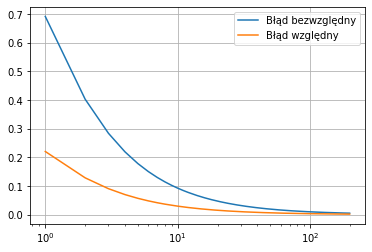

In [53]:
#1 M.in. błąd obcięcia ponieważ liczymy tylko skończoną sumę. (nasz parametr 'n')
#2 Sporządzony niżej wykres
abs_arr = np.zeros(200)
rel_arr = np.zeros(200)
x = np.arange(0,200,1)


for i in range(200):
    abs_arr[i] = main.absolut_error(np.pi, main.pi(i))
    rel_arr[i] = main.relative_error(np.pi, main.pi(i))

plt.semilogx(abs_arr, label="Absolute error")
plt.semilogx(rel_arr, label="Relative error")
plt.legend(["Błąd bezwzględny", "Błąd względny"])
plt.grid()
plt.show()

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

369 ns ± 52.6 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
2.21 µs ± 754 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
1.82 µs ± 186 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
2.21 µs ± 130 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
1.87 µs ± 490 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
1.99 µs ± 160 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
2.24 µs ± 413 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
2.1 µs ± 95.5 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
2.52 µs ± 96.6 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
2.74 µs ± 95 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
5.19 µs ± 946 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
3.78 µs ± 705 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
3.37 µs ± 93 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
3.64 µs ± 52.3 ns per loop (mean ± std. dev. of 8 runs, 30 loops each)
3.56 µs ± 45.9 ns pe

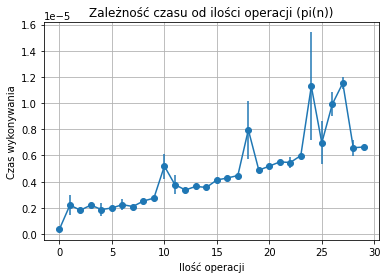

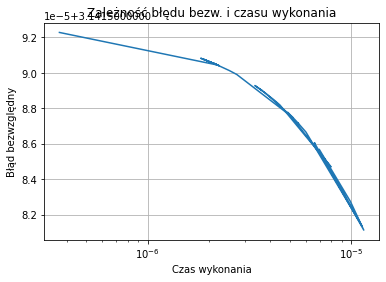

In [48]:
#Zakładam, że chodzi o zad.5 -> z liczbą pi ponieważ tam jest parametr 'n'

time = np.zeros(30)
odchylenie = np.zeros(30)
b_bezw = np.zeros(30)
x = np.arange(0, 30, 1)

for i in range(30):
    saved_timing = %timeit -r 8 -n 30 -o main.pi(i)
    time[i] = saved_timing.average
    odchylenie[i] = saved_timing.stdev
    b_bezw[i] = main.absolut_error(np.pi, time[i])
    
plt.errorbar(x, time, yerr=odchylenie, xerr=None, marker='o')
plt.title('Zależność czasu od ilości operacji (pi(n))')
plt.xlabel("Ilość operacji"), plt.ylabel("Czas wykonywania")
plt.grid()
plt.show()

plt.semilogx(time, b_bezw)
plt.title('Zależność błędu bezw. i czasu wykonania')
plt.xlabel('Czas wykonania'), plt.ylabel('Błąd bezwzględny')
plt.grid()
plt.show()
